<a href="https://colab.research.google.com/github/Anikate-De/TensorFlow-Deep-Learning/blob/main/Transfer%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Transfer Learning with TensorFlow

## What is **Transfer Learning**?

Something here

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-03-28 23:53:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   170MB/s    in 0.9s    

2023-03-28 23:53:43 (170 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
import zipfile

zipref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zipref.extractall()
zipref.close()

In [5]:
import os

for dirpath, dirname, filenames in os.walk('10_food_classes_10_percent/'):
  if len(dirname) > 0:
    print(f'Found {len(dirname)} directories in {dirpath}')
  if len(filenames) > 0:
    print(f'Found {len(filenames)} files in {dirpath}')

Found 2 directories in 10_food_classes_10_percent/
Found 10 directories in 10_food_classes_10_percent/test
Found 250 files in 10_food_classes_10_percent/test/grilled_salmon
Found 250 files in 10_food_classes_10_percent/test/ice_cream
Found 250 files in 10_food_classes_10_percent/test/sushi
Found 250 files in 10_food_classes_10_percent/test/hamburger
Found 250 files in 10_food_classes_10_percent/test/fried_rice
Found 250 files in 10_food_classes_10_percent/test/chicken_curry
Found 250 files in 10_food_classes_10_percent/test/pizza
Found 250 files in 10_food_classes_10_percent/test/ramen
Found 250 files in 10_food_classes_10_percent/test/steak
Found 250 files in 10_food_classes_10_percent/test/chicken_wings
Found 10 directories in 10_food_classes_10_percent/train
Found 75 files in 10_food_classes_10_percent/train/grilled_salmon
Found 75 files in 10_food_classes_10_percent/train/ice_cream
Found 75 files in 10_food_classes_10_percent/train/sushi
Found 75 files in 10_food_classes_10_percent

In [7]:
class_names = sorted(os.listdir('10_food_classes_10_percent/train'))
num_classes = len(class_names)
class_names, num_classes

(['chicken_curry',
  'chicken_wings',
  'fried_rice',
  'grilled_salmon',
  'hamburger',
  'ice_cream',
  'pizza',
  'ramen',
  'steak',
  'sushi'],
 10)

In [8]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimp
import random

# Create a function to show random images
def view_random_images(target_dir, target_class, num_images = 1):
  target_folder = target_dir + target_class

  if (num_images > 10):
    print('A maximum of 10 images is allowed')
    num_images = 10

  # Get a random image path
  random_images = random.sample(os.listdir(target_folder), num_images)

  plt.figure(figsize = (18, 6))

  for index in range(len(random_images)):
    # Read the image using MatplotLib
    img = mpimp.imread(target_folder + '/' + random_images[index])
    plt.subplot(2, 5, index + 1)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')

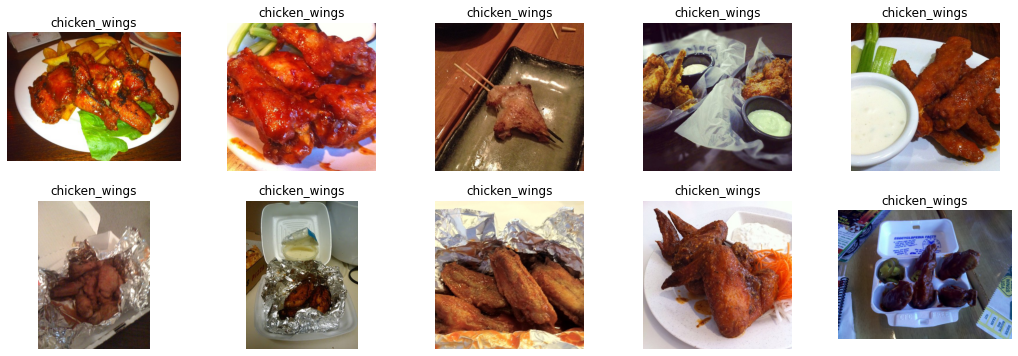

In [10]:
import random
view_random_images(target_dir='10_food_classes_10_percent/train/',
                        target_class=random.choice(class_names),
                   num_images = 10)

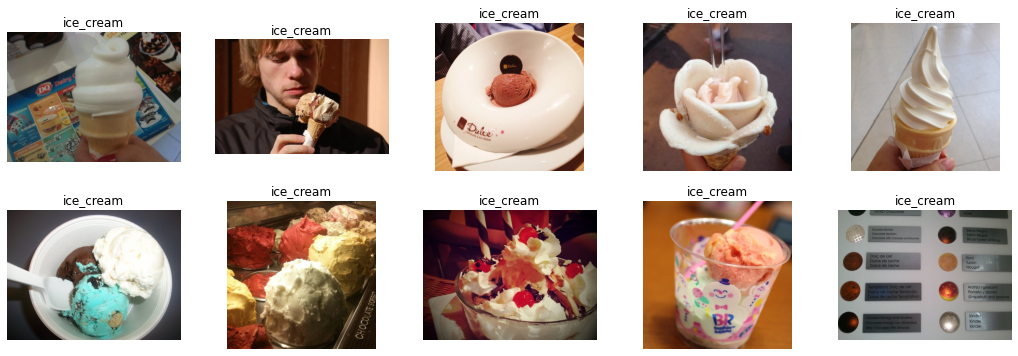

In [11]:
view_random_images(target_dir='10_food_classes_10_percent/train/',
                        target_class=random.choice(class_names),
                   num_images = 10)

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(4)

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Import data and turn it into batches
train_data = train_datagen.flow_from_directory('10_food_classes_10_percent/train',
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'categorical',
                                               seed = 4)
test_data = test_datagen.flow_from_directory('10_food_classes_10_percent/test',
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'categorical',
                                               seed = 4)

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [13]:
import tensorflow_hub as hub

model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1",
                   trainable=False),  # Can be True, see below.
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

In [14]:
model.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [15]:
history = model.fit(train_data, # now 10 different classes 
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Epoch 1/5
24/24 [==============================] - 71s 2s/step - loss: 1.6265 - accuracy: 0.5440 - val_loss: 0.9935 - val_accuracy: 0.7744
Epoch 2/5
24/24 [==============================] - 52s 2s/step - loss: 0.7968 - accuracy: 0.8253 - val_loss: 0.6782 - val_accuracy: 0.8260
Epoch 3/5
24/24 [==============================] - 50s 2s/step - loss: 0.5871 - accuracy: 0.8693 - val_loss: 0.5801 - val_accuracy: 0.8404
Epoch 4/5
24/24 [==============================] - 49s 2s/step - loss: 0.4789 - accuracy: 0.8933 - val_loss: 0.5343 - val_accuracy: 0.8516
Epoch 5/5
24/24 [==============================] - 36s 2s/step - loss: 0.4086 - accuracy: 0.9080 - val_loss: 0.4999 - val_accuracy: 0.8584


In [16]:
model.evaluate(test_data)

79/79 [==============================] - 28s 356ms/step - loss: 0.4999 - accuracy: 0.8584


[0.4998921751976013, 0.8583999872207642]

<Axes: >

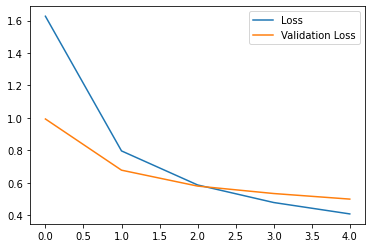

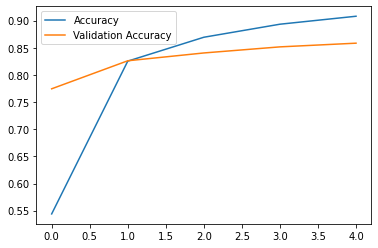

In [27]:
import pandas as pd

pd.DataFrame({'Loss' : history.history['loss'], 'Validation Loss' : history.history['val_loss']}).plot()
pd.DataFrame({'Accuracy' : history.history['accuracy'], 'Validation Accuracy' : history.history['val_accuracy']}).plot()

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimp
import random

# Create a function to show random images
def predict_random_images_multiclass(target_dir, model, class_names, num_images = 1, target_classes = None):

  if (num_images > 10):
    print('A maximum of 10 images is allowed')
    num_images = 10

  if target_classes == None:
    target_classes = class_names

  plt.figure(figsize = (18, 8))

  for i in range(num_images):
    random_class = random.choice(target_classes)
    target_path = target_dir + random_class
    img = mpimp.imread(target_path + '/' + random.choice(os.listdir(path = target_path)))
    img = tf.image.resize(img, size = [224, 224])
    img /= 255

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)


    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0), verbose = 0)

    # Get the predicted class
    pred_class = class_names[pred.argmax()]

    if pred_class == random_class:
      color = 'green'
    else:
      color = 'red'

    plt.title(f'Prediction: {pred_class.title()}\nTrue: {random_class.title()}\nConfidence: {(tf.reduce_max(pred) * 100):.2f}%', fontdict = {'color' : color})
    plt.axis('off')

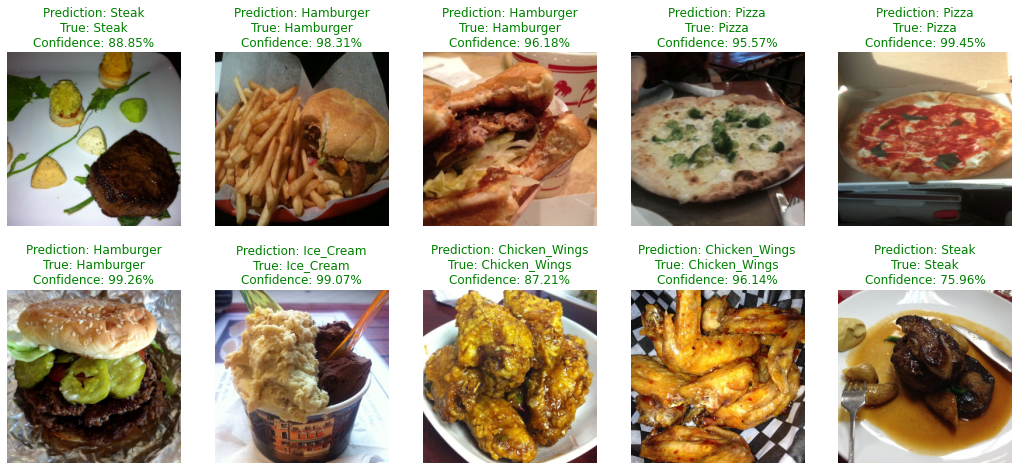

In [20]:
predict_random_images_multiclass(target_dir = '10_food_classes_10_percent/test/', model = model, class_names = class_names, num_images = 10)

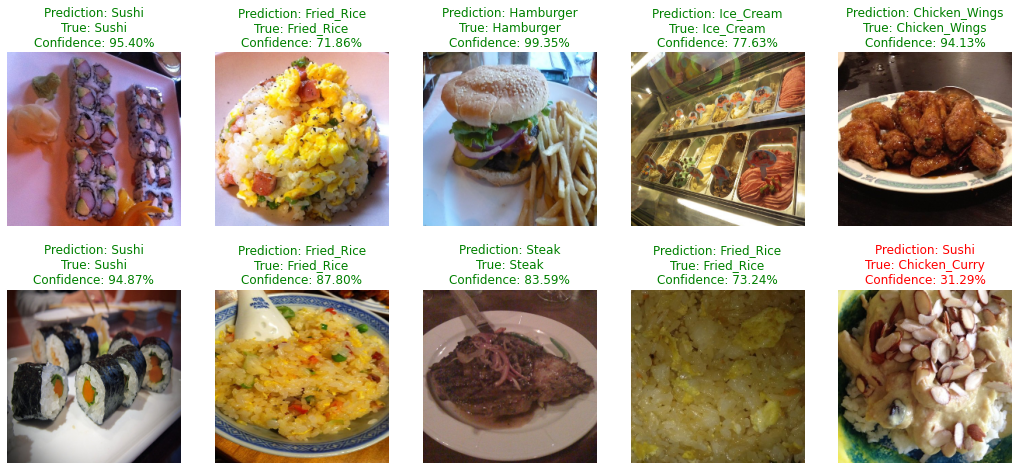

In [23]:
predict_random_images_multiclass(target_dir = '10_food_classes_10_percent/test/', model = model, class_names = class_names, num_images = 10)